**Churn Modelling Data** (P3- Churn-Modelling Data.xlsx) – 30 Marks

**1.  Customer Demographics:**
   - What is the distribution of customers across different age groups?
   - Analyze the gender distribution of customers.

**2.  Churn Analysis:**
   - What percentage of customers have churned?
   - What are the main reasons for customer churn?
   - Identify any patterns or trends among customers who have churned.

**3.  Product Usage:**
   - What are the most commonly used products or services?
   - Analyze the usage patterns of different customer segments.

**4.  Financial Analysis:**
   - What is the average account balance of customers?
   - Compare the financial characteristics of churned vs. non-churned customers.

**5.  Predictive Modeling:**
   - Which factors are the most significant predictors of customer churn?
   - Develop a predictive model to identify at-risk customers.


**Given the churn modelling dataset we have to perform the above mentioned tasks.**

importing necessary libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

Reading excel data **using pd.read_excel()** and store it in the variable data.

In [2]:
data = pd.read_excel('/content/P3- Churn-Modelling Data.xlsx')

Inorder to perform analytics we will make the dataframe of the data by using **pd.DataFrame()**.

In [66]:
df = pd.DataFrame(data)

In [4]:
df.head(10)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,churned
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
5,6,15574012,Chu,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1
6,7,15592531,Bartlett,822,France,Male,50,7,0.00,2,1,1,10062.80,0
7,8,15656148,Obinna,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1
8,9,15792365,He,501,France,Male,44,4,142051.07,2,0,1,74940.50,0
9,10,15592389,H?,684,France,Male,27,2,134603.88,1,1,1,71725.73,0


# **1.CUSTOMER DEMOGRAPHICS**

**a) Distribution of customers across different age groups**

In [5]:
print(df['Age'].describe())

count    10000.000000
mean        38.921800
std         10.487806
min         18.000000
25%         32.000000
50%         37.000000
75%         44.000000
max         92.000000
Name: Age, dtype: float64


In [6]:
len(df)

10000

The below provided code defines two lists,**bins and labels**, which are often **used in data analysis for categorizing data** into specific intervals or bins.

In [7]:
bins = [0,20,30,40,50,60,70,80,90,100]
labels = ['0-19','20-29','30-39','40-49','50-59','60-69','70-79','80-89','90-99']

In [8]:
df['AgeGroup'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)

In [9]:
df['AgeGroup'].value_counts().sort_index()

AgeGroup
0-19       49
20-29    1592
30-39    4346
40-49    2618
50-59     869
60-69     375
70-79     136
80-89      13
90-99       2
Name: count, dtype: int64

In [10]:
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'churned', 'AgeGroup'],
      dtype='object')

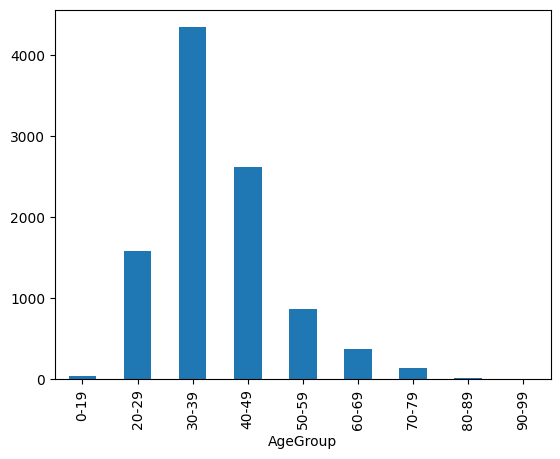

In [11]:
df['AgeGroup'].value_counts().sort_index().plot(kind='bar')
plt.show()

From the above graph we can observe that people from the age group between 30 and 39 are more users,people belonging to 40-49 are second most highest customers and next comes between the age group 20-29 and remaining are negligibly small.

**b) Analyzing the gender distribution of customers**

In [12]:
df['Gender'].value_counts()

Gender
Male      5457
Female    4543
Name: count, dtype: int64

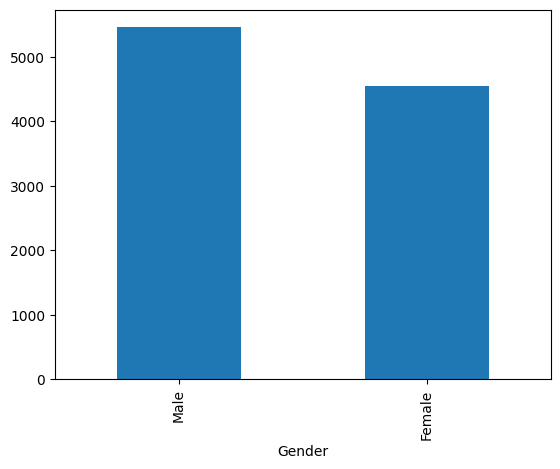

In [13]:
df['Gender'].value_counts().plot(kind='bar')
plt.show()

From the above graph we can observe that there are **more male customers than female customers**.

# **2.CHURN ANALYSIS**

**a) percentage of customers have churned**

In [14]:
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'churned', 'AgeGroup'],
      dtype='object')

In [15]:
df['churned'].value_counts()

churned
0    7963
1    2037
Name: count, dtype: int64

In [16]:
churned_count = df['churned'].sum()
churned_count

2037

In [17]:
total_customers = len(df)
total_customers

10000

In [18]:
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'churned', 'AgeGroup'],
      dtype='object')

In [19]:
import math
percentage_churned = (churned_count/total_customers)*100
percentage_churned = '%.2f' % percentage_churned
percentage_churned

'20.37'

In [20]:
print(f'percentage of churned customers are {percentage_churned}%')

percentage of churned customers are 20.37%


**b)Main reasons for customer churn and**

 **c)Identifying any patterns or trends among customers who have churned**

Inorder to do the above mentioned task we need to perform EDA(Exploratory Data Analysis). **Exploratory Data Analysis (EDA)**is a crucial initial step in data science projects. It involves **analyzing and visualizing data** to understand its key characteristics, uncover patterns, and identify relationships between variables refers to the method of studying and exploring record sets to apprehend their predominant traits, **discover patterns, locate outliers,** and identify relationships between variables.

In [21]:
# Calculate correlation matrix

numeric_features = df[['CreditScore','Age','Tenure','Balance','NumOfProducts','EstimatedSalary','IsActiveMember','HasCrCard','churned']]
numeric_features.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,EstimatedSalary,IsActiveMember,HasCrCard,churned
0,619,42,2,0.00,1,101348.88,1,1,1
1,608,41,1,83807.86,1,112542.58,1,0,0
2,502,42,8,159660.80,3,113931.57,0,1,1
3,699,39,1,0.00,2,93826.63,0,0,0
4,850,43,2,125510.82,1,79084.10,1,1,0


In [22]:
correlation_matrix = numeric_features.corr()
print("Correlation with churned status:")
print(correlation_matrix['churned'].sort_values(ascending=False))

Correlation with churned status:
churned            1.000000
Age                0.285323
Balance            0.118533
EstimatedSalary    0.012097
HasCrCard         -0.007138
Tenure            -0.014001
CreditScore       -0.027094
NumOfProducts     -0.047820
IsActiveMember    -0.156128
Name: churned, dtype: float64


From the above output we can see the correlation cofficient values of various features with churned status.We can observe that the columns **Age, Balance and EstimatedSalary are positively correlated with the churned status and remaining all were negatively correalted** .Correlation measures the **strength and direction** of a linear relationship between two variables. It is quantified by the **correlation coefficient, which ranges from -1 to 1**.Moreover it is said to be **perfect positive realtionship** if the correlation coefficient value is **'+1'**, it is said to be **perfect negative relationship** if the correlation coefficient value is **'-1'** and there is **no corelation** between the two features if the correlation coefficient value is **'0'**.So,from the above data We can conclude that **Age** plays significant role in determining the churned status and **followed by 'Balance' and 'IsActiveMember'** columns.


**Inorder to visualise the distribution of various features with churn column the following steps are performed**

**1.Defining Key Features:**

This line defines a list of features that you want to visualize. These features include both numerical and categorical variables that may impact customer churn.








In [23]:
import seaborn as sns
features = ['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary']

**2.Creating the Figure:** This line initializes a new figure with a specified size of 20 inches by 20 inches. This larger size ensures that all subplots will fit comfortably within the figure.

**3.Looping through Features:**This line starts a for loop that iterates over each feature in the features list. The **enumerate function** is used to get both the index (i) and the feature name (feature). The loop counter i starts from 1.

**4.Creating Subplots:** Within the loop, this line creates a subplot in a 5-row by 2-column grid. The position of each subplot is determined by the loop index i. This means the first feature will be in the first subplot, the second feature in the second subplot, and so on.

**5.Conditional Plotting:**


  **a)Categorical Features:**
If the feature is categorical (its data type is 'object'), a count plot is created using sns.


   


*   **countplot :** The count plot shows the count of each category within the feature, differentiated by the churned status using the hue parameter.
*   **sns.countplot:** This Seaborn function creates a count plot, which displays the count of observations for each category in a categorical feature.

**Description of arguments of countplot() function**:
*   **data=df:** Specifies the DataFrame containing the data to be plotted.
*   **x=feature:** Sets the feature to be plotted on the x-axis. This feature is categorical.

*   **hue='churned':** Adds a color differentiation based on the churned status. This allows us to see the distribution of churned vs. non-churned customers within each category of the feature.
*   **Example:** If the feature is 'Gender', this plot will show the count of male and female customers, differentiated by whether they have churned or not.




**b)Numerical Features:**
If the feature is numerical, a histogram is created using sns.

**Key points to know:**


*   **Histplot :**
 The histogram shows the distribution of the feature values, again differentiated by the churned status using the hue parameter.**The kde=True argument** adds a **Kernel Density Estimate (KDE)** line to the histogram, which smooths out the distribution.

*   **sns.histplot:** This Seaborn function creates a histogram, which shows the distribution of a numerical feature.




**Description of arguments of histplot() function:**



*   **data=df:** Specifies the DataFrame containing the data to be plotted.
*   **x=feature:** Sets the feature to be plotted on the x-axis. This feature is numerical.


*   **hue='churned' :** Adds a color differentiation based on the churned status. This allows us to see the distribution of churned vs. non-churned customers within the numerical values of the feature.
*   **kde=True :** Adds a **Kernel Density Estimate (KDE)** line to the histogram. The KDE is a smoothed curve that represents the distribution of the data, providing a clearer picture of the data density.

*   **Example:** If the feature is **'CreditScore'**, this plot will show the distribution of credit scores, with separate distributions for churned and non-churned customers.











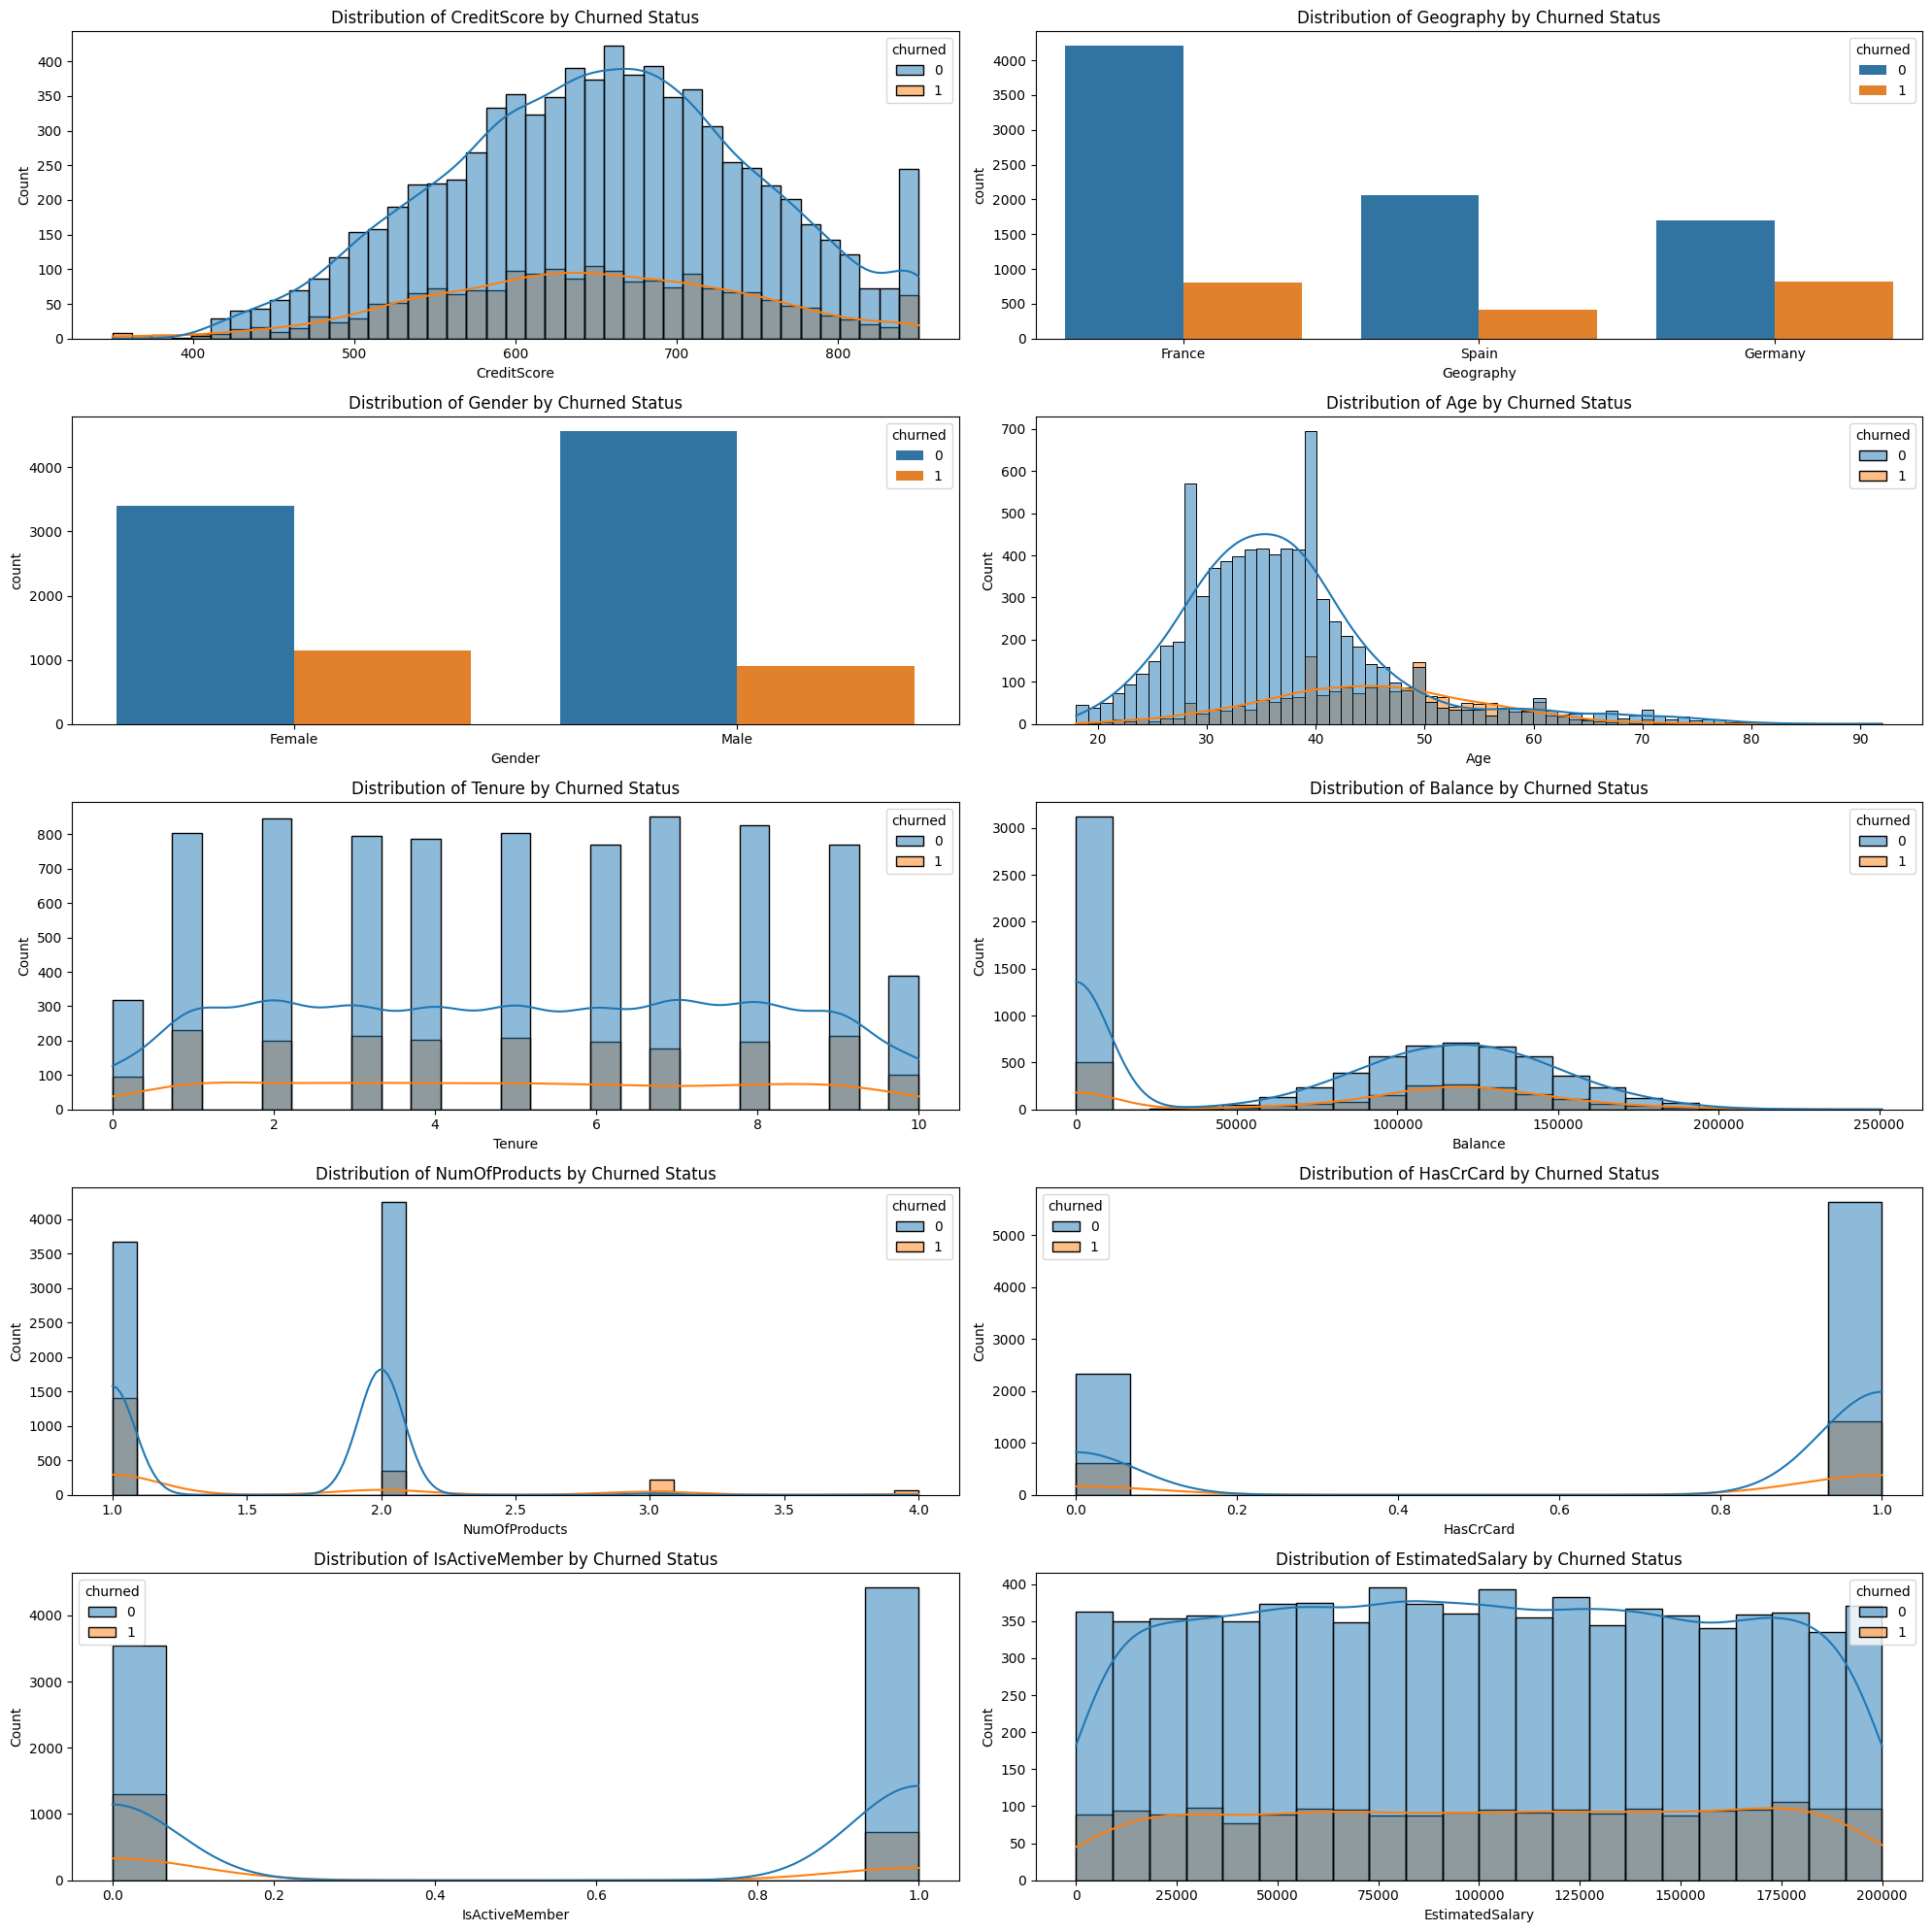

In [24]:
plt.figure(figsize=(20, 20))
for i, feature in enumerate(features, 1):
    plt.subplot(5, 2, i)

    if df[feature].dtype == 'object':
        sns.countplot(data=df, x=feature, hue='churned')
    else:
        sns.histplot(data=df, x=feature, hue='churned', kde=True)
    plt.title(f'Distribution of {feature} by Churned Status')

plt.tight_layout()
plt.show()

In [25]:
df[df['NumOfProducts']==3]

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,churned,AgeGroup
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,40-49
30,31,15589475,Azikiwe,591,Spain,Female,39,3,0.00,3,1,0,140469.38,1,30-39
88,89,15622897,Sharpe,646,France,Female,46,4,0.00,3,1,0,93251.42,1,40-49
90,91,15757535,Heap,647,Spain,Female,44,5,0.00,3,1,1,174205.22,1,40-49
227,228,15676895,Cattaneo,547,Germany,Female,39,6,74596.15,3,1,1,85746.52,1,30-39
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9737,9738,15741197,Calzada,710,Spain,Male,22,8,0.00,3,1,0,107292.91,0,20-29
9747,9748,15775761,Iweobiegbunam,610,Germany,Female,69,5,86038.21,3,0,0,192743.06,1,60-69
9800,9801,15640507,Li,762,Spain,Female,35,3,119349.69,3,1,1,47114.18,1,30-39
9877,9878,15572182,Onwuamaeze,505,Germany,Female,33,3,106506.77,3,1,0,45445.78,1,30-39


**From the above plots we can observe the following scenarios:**

**1) Distribution of credit score by churned status:**

The credit scores range between 400 and above 800. From the histogram, we observe that initially, as the credit score increases, there is a small increase in the churn rate. This rate continues to increase up to a certain point, after which the number of churned customers starts to decrease gradually. **Hence, we can conclude that people with credit scores ranging between 600 and 700 fall into the churned category.**

**2) Distribution of Geography by churned status :**

There were only three Geographic locations they are **France, Spain,Germany.**As the geographic location is categorical variable we have represented using a count plot.we can observe there were **highest number of customers and cusomers belonging to the non-chunrned cateogory are more from the France** geographic location,and **second highest customers and customers belonging to the non-churned are less than France and more than Germany from Spain location** and **least from Germany.**Comparatively there were less customers belong to churned category in the location **Spain**.

**3) Distribution of Gender by churned status :**

As the Gender is a categorical variable with the values MALE and FEMALE.We will be using count plot for this.From the count plot we can observe that **there were more MALE customers as compared to FEMALE customers**.The number of **male customers** belong to churn category are **less than female customers**.Majority are female who belongs to churn category.

**4) Distribution of Age by churn status:**

The column "Age" contains numerical data. The histogram was drawn with age groups ranging from **20 to 80 on the x-axis and the count of customers on the y-axis**. From the graph, it has been observed that there are very few people in the **age group 20-30, with almost no churned customers**. In the age group 30-50, the **number of churned customers increases significantly**. **By closely observing the age group 50-60, we see that the number of churned customers actually exceeds the number of non-churned customers in some periods**. Above the age of 60, there are very few customers.

**5) Distribution of Tenure by churned status :**

The column Tenure doesn't have much impact on deciding the churned status.



**6) Distribution of Balance by churned status :**

The feature balance have a significant role in deciding the churned status of the customer.As it has significant correlation in comparing with other columns except age.It is very much crucial in deciding the target.As we look into the graph we can observe that initially by the increase in the balance the churned customers have increased significantly and again decreasing from certain point slowly.




**7) Distribution of No of Products by churned status :**

From the graph we can observe that the customers who belongs to the category of buying 3 produts are more likely to be present among the churned customers.



**8) Distribution of hasCrCard by churned status :**

This column doesn't have significant impact on deciding the churned status.






**9) Distribution of IsActiveMember by churned status :**

The column **IsActiveMember is negatively corelated with the churn status** and also by observing the above graph we can coclude that People who were **not among the category of  active members are likely to be churned customers**.

**10) Distribution of EstimatedSalary by churned status :**

This column also significantly doesn't contribute in deciding the churned status of the customers.



In [26]:
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'churned', 'AgeGroup'],
      dtype='object')

# **3. PRODUCT USAGE**

**a) Most commonly used products or services**

In [27]:
product_counts=df['NumOfProducts'].value_counts()
product_counts

NumOfProducts
1    5084
2    4590
3     266
4      60
Name: count, dtype: int64

In [28]:
most_common_product = product_counts.idxmax()
most_common_product

1

Hence **mostly single product** is bought by the customers and **followed by two products**.

**Graphical Visualisation of the distribution of products used by customers**

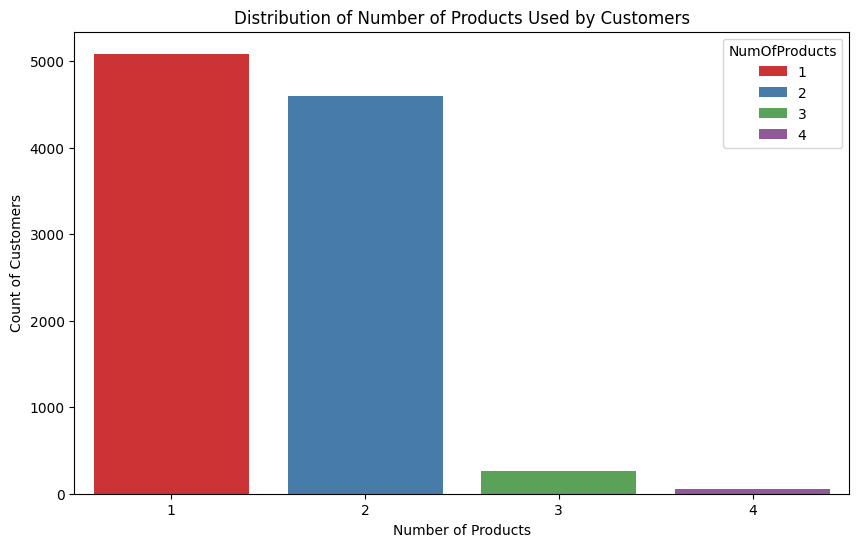

In [57]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='NumOfProducts',hue='NumOfProducts', palette='Set1')
plt.title('Distribution of Number of Products Used by Customers')
plt.xlabel('Number of Products')
plt.ylabel('Count of Customers')
plt.show()


**b) Analyze the usage patterns of different customer segments.**

We'll segment the customers based on the following criteria:


*   Age Groups
*   Geography

*   Gender








In [30]:
df['AgeGroup'].value_counts().sort_index()

AgeGroup
0-19       49
20-29    1592
30-39    4346
40-49    2618
50-59     869
60-69     375
70-79     136
80-89      13
90-99       2
Name: count, dtype: int64

**Graphical representation of the distribution of number of products used by age group**

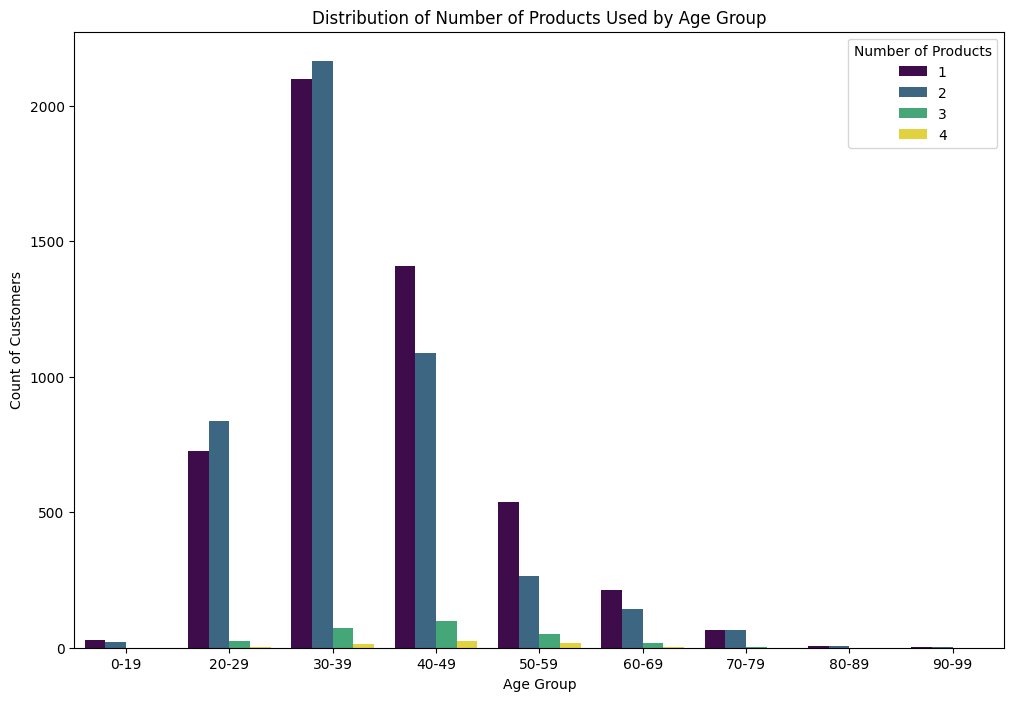

In [31]:
plt.figure(figsize=(12, 8))
sns.countplot(data=df, x='AgeGroup', hue='NumOfProducts', palette='viridis')
plt.title('Distribution of Number of Products Used by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Count of Customers')
plt.legend(title='Number of Products')
plt.show()

**Graphical representation of the distribution of number of products used by geography**

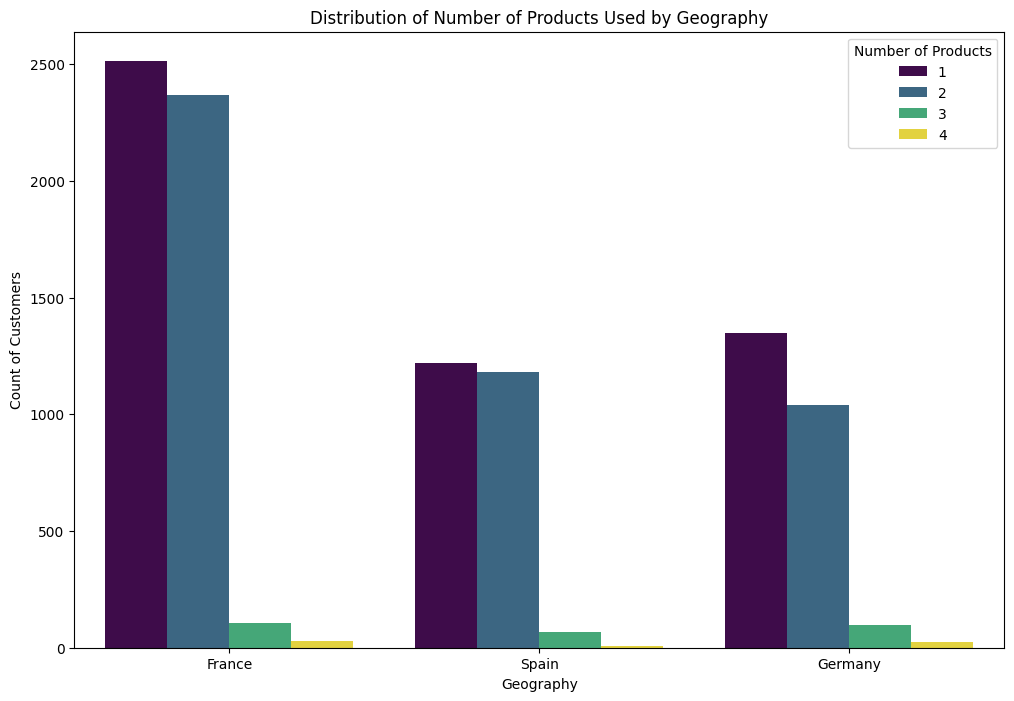

In [58]:
plt.figure(figsize=(12, 8))
sns.countplot(data=df, x='Geography', hue='NumOfProducts', palette='viridis')
plt.title('Distribution of Number of Products Used by Geography')
plt.xlabel('Geography')
plt.ylabel('Count of Customers')
plt.legend(title='Number of Products')
plt.show()

**Graphical representation of the distribution of number of products used by gender.**

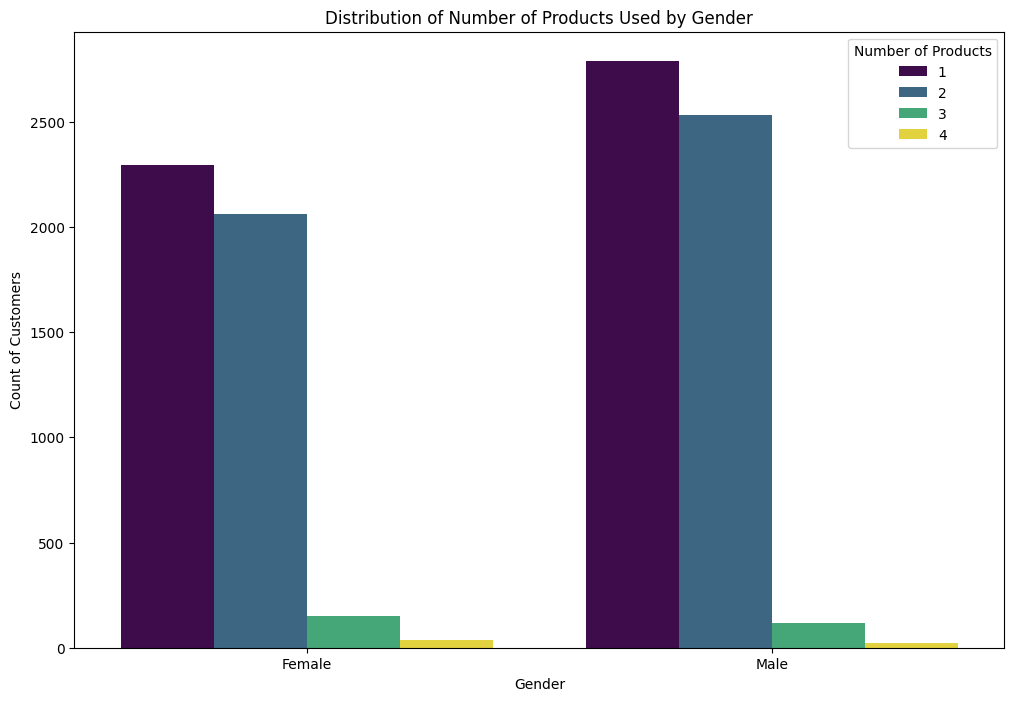

In [59]:
plt.figure(figsize=(12, 8))
sns.countplot(data=df, x='Gender', hue='NumOfProducts', palette='viridis')
plt.title('Distribution of Number of Products Used by Gender')
plt.xlabel('Gender')
plt.ylabel('Count of Customers')
plt.legend(title='Number of Products')
plt.show()

**Graphical representation of Churn Status by Age Group**

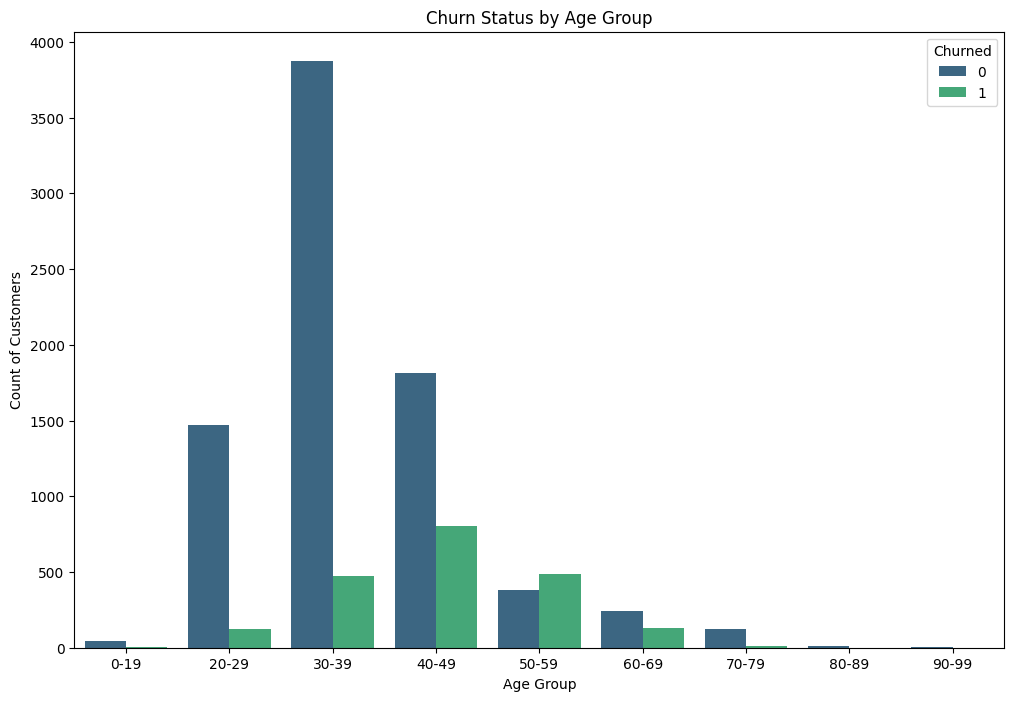

In [34]:
# Age group vs churn status
plt.figure(figsize=(12, 8))
sns.countplot(data=df, x='AgeGroup', hue='churned', palette='viridis')
plt.title('Churn Status by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Count of Customers')
plt.legend(title='Churned')
plt.show()

**Graphical representation of Churn Status by Geography**

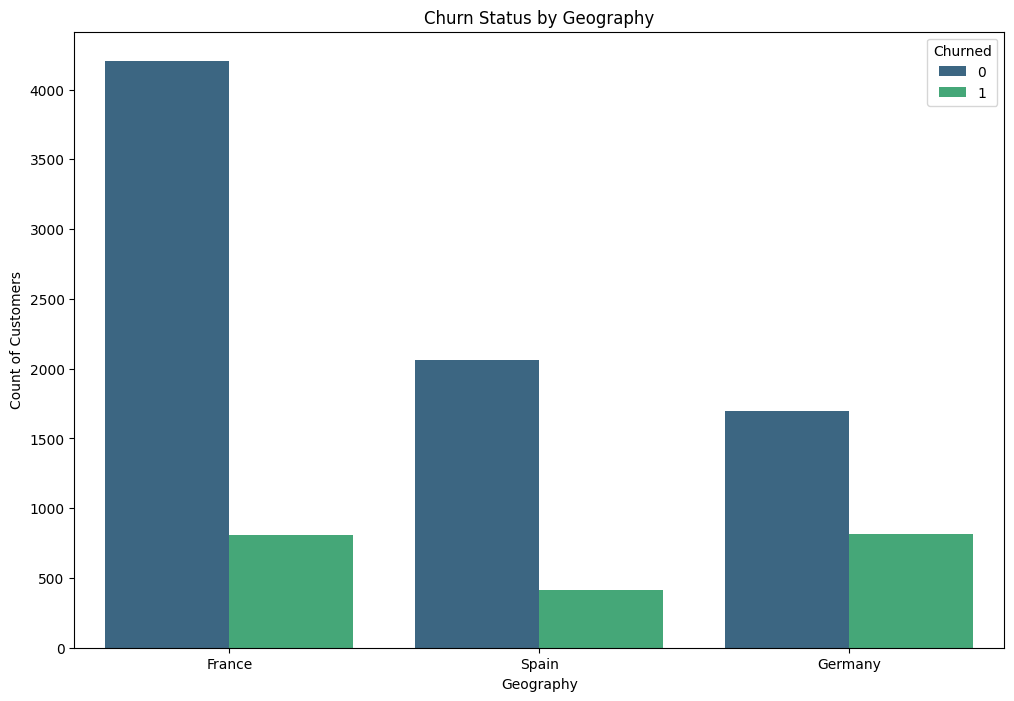

In [35]:
# Geography vs churn status
plt.figure(figsize=(12, 8))
sns.countplot(data=df, x='Geography', hue='churned', palette='viridis')
plt.title('Churn Status by Geography')
plt.xlabel('Geography')
plt.ylabel('Count of Customers')
plt.legend(title='Churned')
plt.show()

**Graphical representation of the Churn Status by Gender.**

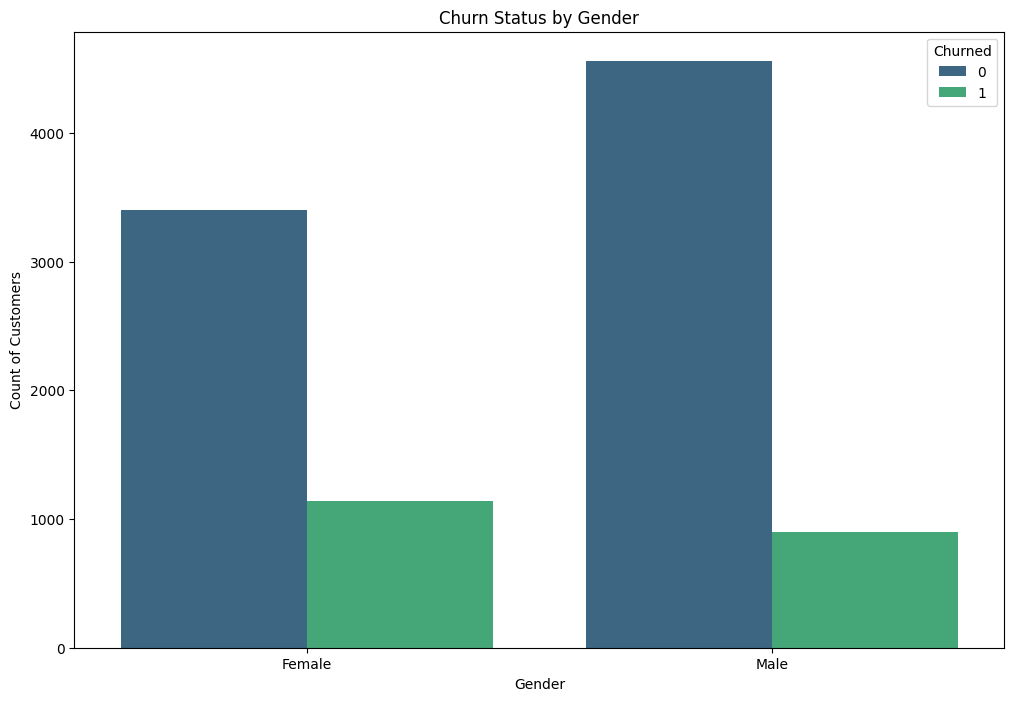

In [36]:
# Gender vs churn status
plt.figure(figsize=(12, 8))
sns.countplot(data=df, x='Gender', hue='churned', palette='viridis')
plt.title('Churn Status by Gender')
plt.xlabel('Gender')
plt.ylabel('Count of Customers')
plt.legend(title='Churned')
plt.show()

# **4.FINANCIAL ANALYSIS**

**a) The average account balance of customers.**

In [37]:
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'churned', 'AgeGroup'],
      dtype='object')

In [38]:
avg_balance=df['Balance'].mean()

In [39]:
print("The Average account Balance of customers is ",avg_balance)

The Average account Balance of customers is  76485.889288


**b) Comparing the financial characteristics of churned vs. non-churned customers.**

In [40]:
financial_features=['CreditScore','Balance','EstimatedSalary']

In [41]:
churned_stats=df[df['churned']==1][financial_features].describe()
churned_stats

,CreditScore,Balance,EstimatedSalary
count,2037.000000,2037.000000,2037.000000
mean,645.351497,91108.539337,101465.677531
std,100.321503,58360.794816,57912.418071
min,350.000000,0.000000,11.580000
25%,578.000000,38340.020000,51907.720000
50%,646.000000,109349.290000,102460.840000
75%,716.000000,131433.330000,152422.910000
max,850.000000,250898.090000,199808.100000


In [42]:
non_churned_stats=df[df['churned']==0][financial_features].describe()
non_churned_stats

,CreditScore,Balance,EstimatedSalary
count,7963.000000,7963.000000,7963.000000
mean,651.853196,72745.296779,99738.391772
std,95.653837,62848.040701,57405.586966
min,405.000000,0.000000,90.070000
25%,585.000000,0.000000,50783.490000
50%,653.000000,92072.680000,99645.040000
75%,718.000000,126410.280000,148609.955000
max,850.000000,221532.800000,199992.480000


**Grpahical representations of Distribution of CreditScore,Balance,EstimatedSalary by Churned Status.**

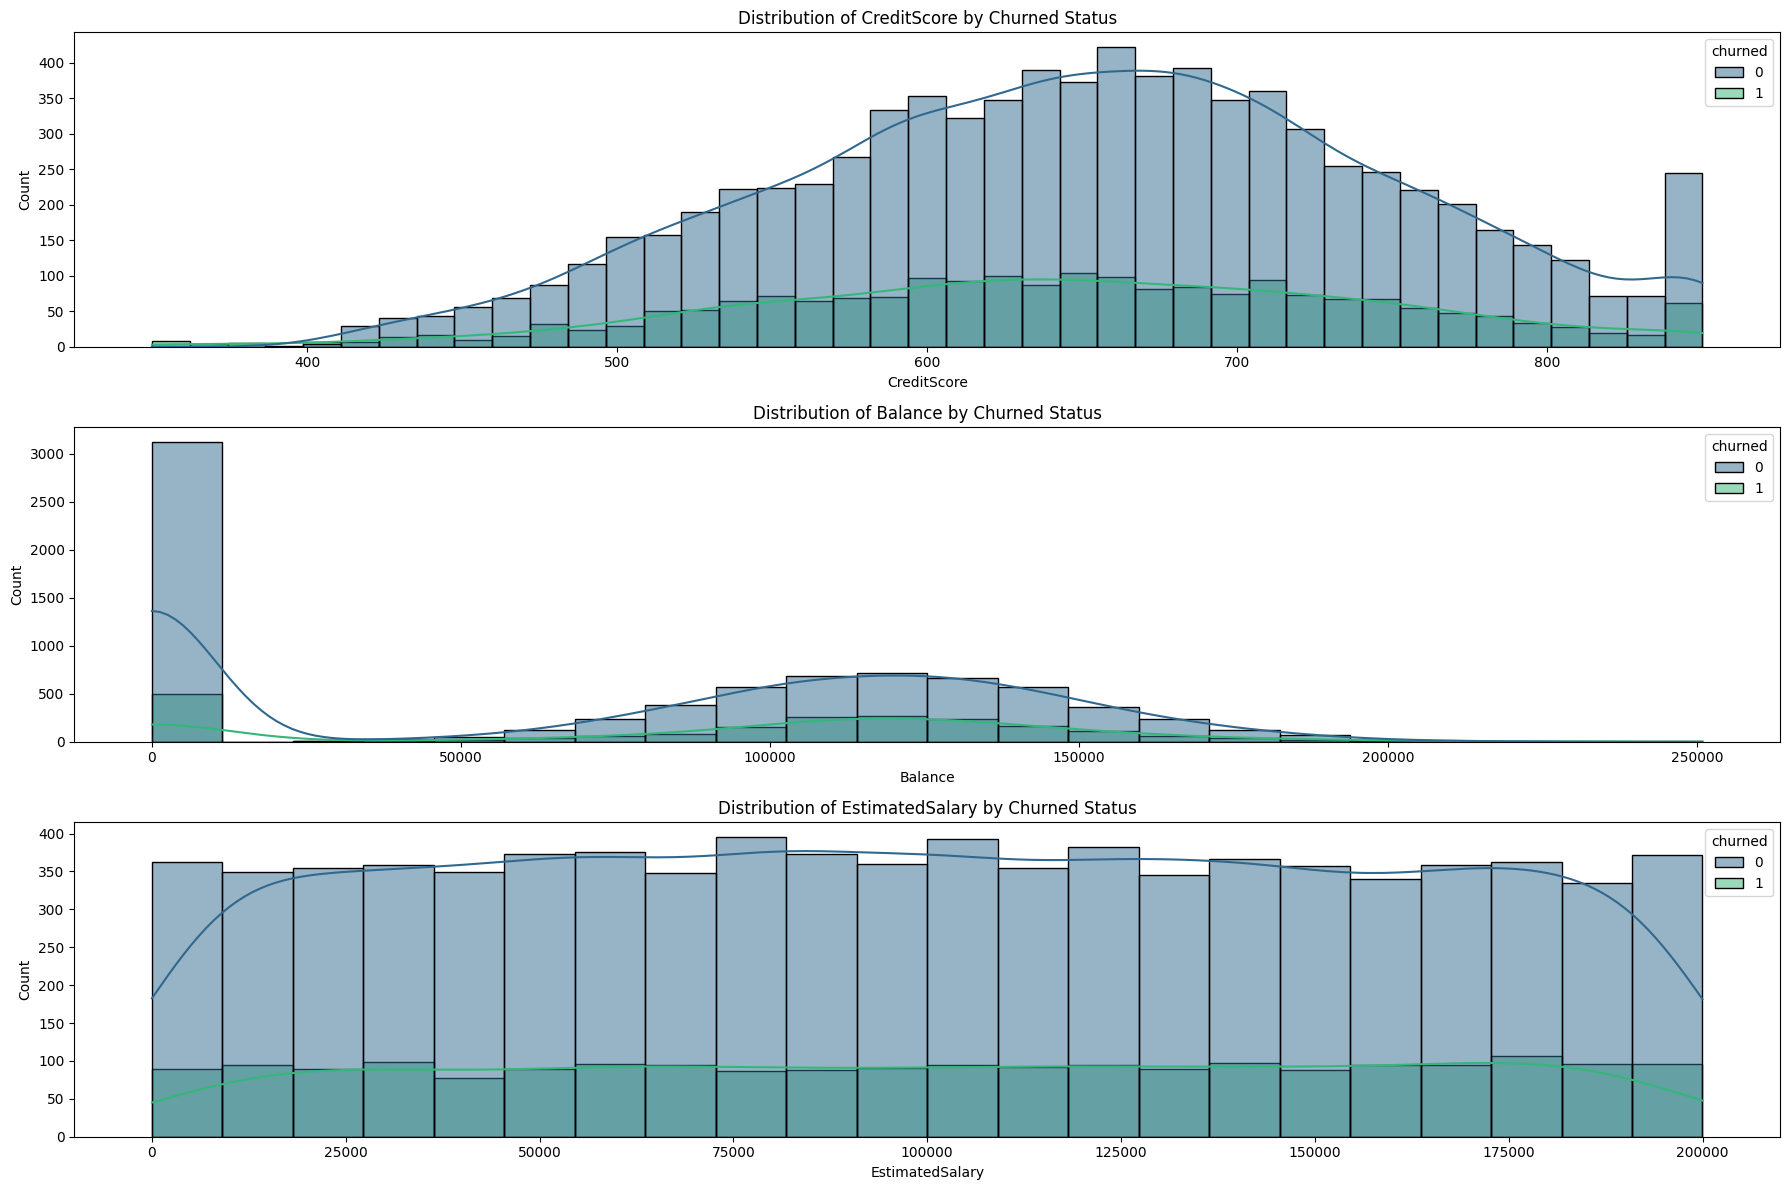

In [43]:
plt.figure(figsize=(18, 12))
for i, feature in enumerate(financial_features, 1):
    plt.subplot(3, 1, i)
    sns.histplot(data=df, x=feature, hue='churned', kde=True, palette='viridis')
    plt.title(f'Distribution of {feature} by Churned Status')

plt.tight_layout()
plt.show()

From the above descriptive analysis we can conclude the following**(churned v/s non_churned financial analysis**):


*   **Credit Scores :** Churned customers tend to have slightly lower average and median credit scores compared to non-churned customers. The distribution is slightly wider for churned customers.
*   **Balances :** Churned customers generally have higher balances, both in terms of mean and median, compared to non-churned customers. A significant portion of non-churned customers have zero balances.

*    **Estimated Salaries :** Both churned and non-churned customers have similar average and median estimated salaries, with comparable variability.







# **5.PREDICTIVE MODELLING**

**a) The factors that are the most significant predictors of customer churn.**

In [44]:
numeric_features.corr()

,CreditScore,Age,Tenure,Balance,NumOfProducts,EstimatedSalary,IsActiveMember,HasCrCard,churned
CreditScore,1.000000,-0.003965,0.000842,0.006268,0.012238,-0.001384,0.025651,-0.005458,-0.027094
Age,-0.003965,1.000000,-0.009997,0.028308,-0.030680,-0.007201,0.085472,-0.011721,0.285323
Tenure,0.000842,-0.009997,1.000000,-0.012254,0.013444,0.007784,-0.028362,0.022583,-0.014001
Balance,0.006268,0.028308,-0.012254,1.000000,-0.304180,0.012797,-0.010084,-0.014858,0.118533
NumOfProducts,0.012238,-0.030680,0.013444,-0.304180,1.000000,0.014204,0.009612,0.003183,-0.047820
EstimatedSalary,-0.001384,-0.007201,0.007784,0.012797,0.014204,1.000000,-0.011421,-0.009933,0.012097
IsActiveMember,0.025651,0.085472,-0.028362,-0.010084,0.009612,-0.011421,1.000000,-0.011866,-0.156128
HasCrCard,-0.005458,-0.011721,0.022583,-0.014858,0.003183,-0.009933,-0.011866,1.000000,-0.007138
churned,-0.027094,0.285323,-0.014001,0.118533,-0.047820,0.012097,-0.156128,-0.007138,1.000000


In [45]:
print(correlation_matrix['churned'].sort_values(ascending=False))

churned            1.000000
Age                0.285323
Balance            0.118533
EstimatedSalary    0.012097
HasCrCard         -0.007138
Tenure            -0.014001
CreditScore       -0.027094
NumOfProducts     -0.047820
IsActiveMember    -0.156128
Name: churned, dtype: float64


**Visualization of Correlation between the features by Heat-Map**

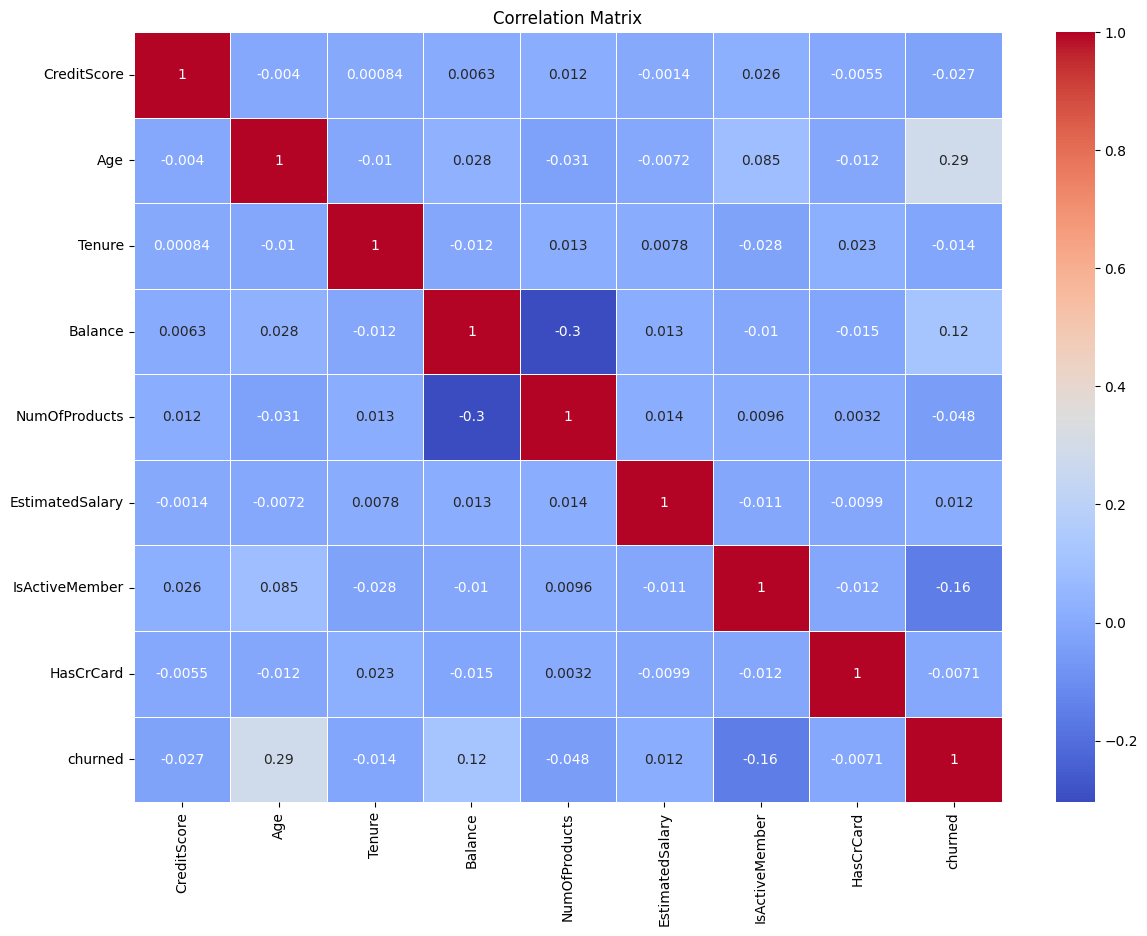

In [46]:
plt.figure(figsize=(14, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

From the above statistics we observe that Age and balance show significant positive linear relationship with churn status and IsActiveMember column shows significant relationship but it is an inverse realtionship with churn status .Hence I can conclude that **AGE,BALANCE and ISACTIVEMEMBERS** columns are the most significant predictors of the customer churn.

 **b) Develop a predictive model to identify at-risk customers.**

**To develop a predictive model to identify at-risk customers, we'll use machine learning techniques. We'll follow these steps:**



1.   **Data Preprocessing:** Prepare the data for modeling.

2.   **Feature Engineering:** Convert categorical variables to numerical values and scale the features.

3.   **Model Selection:** Choose a machine learning algorithm.
4.   **Training and Evaluation:** Train the model and evaluate its performance.

5.   **Prediction:** Use the model to predict at-risk customers.






In [47]:
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'churned', 'AgeGroup'],
      dtype='object')

# **Step 1: Data Preprocessing**

**We'll start by preparing the data, handling missing values (if any), and converting categorical variables into numerical formats.**

In [48]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

**Drop unnecessary columns using drop() function.**

**Set the inplace parameter to True to modify the original DataFrame and print the modified DataFrame.**

In [67]:
df.drop(columns=['RowNumber', 'CustomerId', 'Surname'], inplace=True)

In [68]:
df.columns

Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'churned'],
      dtype='object')

In [69]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,churned
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


**Convert categorical variables into dummy/indicator variables.**

**drop_first=True , default value is  False.The use of this parameter is **
** Whether to get k-1 dummies out of k categorical levels by removing the first level.**

In [70]:
df_encoded = pd.get_dummies(df, columns=['Geography', 'Gender'], drop_first=True)

In [72]:
df_encoded.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,churned,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,False,False,False
1,608,41,1,83807.86,1,0,1,112542.58,0,False,True,False
2,502,42,8,159660.80,3,1,0,113931.57,1,False,False,False
3,699,39,1,0.00,2,0,0,93826.63,0,False,False,False
4,850,43,2,125510.82,1,1,1,79084.10,0,False,True,False


**Splitting the data into features(X) and target(y)**

In [73]:
X = df_encoded.drop(columns=['churned'])
y = df_encoded['churned']

**Split the data into training and testing sets**

In [74]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

**Scaling the features by using StandardScaler**

In [75]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# **Step 2: Model Selection and Training**

**We'll use a Random Forest classifier for this task due to its effectiveness and interpretability.**

In [77]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score, confusion_matrix

#Initialize the Random Forest classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

# Predict on the test set
y_pred = rf_model.predict(X_test)
y_pred_proba = rf_model.predict_proba(X_test)[:, 1]

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_proba)
print("Accuracy:", accuracy)
print("ROC AUC Score:", roc_auc)
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.8673333333333333
ROC AUC Score: 0.8549506571486891

Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.96      0.92      2416
           1       0.76      0.47      0.58       584

    accuracy                           0.87      3000
   macro avg       0.82      0.72      0.75      3000
weighted avg       0.86      0.87      0.85      3000



**Step 3: Predicting At-Risk Customers**

Now, let's identify the at-risk customers using the trained model.

In [78]:
# Predict the probabilities of churn for the test set
test_probabilities = rf_model.predict_proba(X_test)[:, 1]

# Set a threshold to classify customers as at-risk
threshold = 0.5  # You can adjust this threshold based on your business needs

# Classify customers as at-risk if their predicted probability of churn is greater than the threshold
at_risk_customers = test_probabilities > threshold

# Retrieve the original indices of the test set
test_indices = y_test.index

# Get the indices of at-risk customers in the original DataFrame
at_risk_indices = test_indices[at_risk_customers]

# Retrieve the original customer data for these at-risk customers
at_risk_customer_data = df.loc[at_risk_indices]

print("\nAt-Risk Customers:\n", at_risk_customer_data)



At-Risk Customers:
       CreditScore Geography  Gender  Age  Tenure    Balance  NumOfProducts  \
2750          481    France  Female   57       9       0.00              3   
7487          651    France  Female   56       4       0.00              1   
5272          850    France    Male   47       6       0.00              1   
9920          678    France  Female   49       3  204510.94              1   
3337          579     Spain    Male   56       4   99340.83              1   
...           ...       ...     ...  ...     ...        ...            ...   
524           661    France    Male   48       3  120320.54              1   
308           614    France    Male   50       4  137104.47              1   
881           679    France  Female   43       4       0.00              3   
2399          541   Germany    Male   51       7   90373.28              2   
1405          359    France  Female   44       6  128747.69              1   

      HasCrCard  IsActiveMember  Estimated